Esta notebook contiene bloques de código útiles para el juego The Three Musketeers

Juego original: https://www.onlinesologames.com/three-musketeers

In [1]:
from three_musketeers_env import ThreeMusketeersEnv
from captain_pete import CaptainPete
from play import play_multiple_games, plot_results, play_vs_other_agent

Configuracion


In [5]:
num_games_value = 100           #Número de juegos a jugar
grid_size_value = 5             #Tamaño del tablero

max_depth_value=3               #Profundidad máxima de la búsqueda

alignment_weight_value=10       #Peso de la alineación de las piezas
trap_weight_value=20            #Peso de caer en las trampas
moves_weight_value=10           #Peso de la cantidad de movimientos posibles

In [3]:
#No cambiar
env = ThreeMusketeersEnv(grid_size_value, render_mode='rgb_array')
self_player = 1

Minimax vs Captain Pete

100%|██████████| 100/100 [00:31<00:00,  3.22it/s]


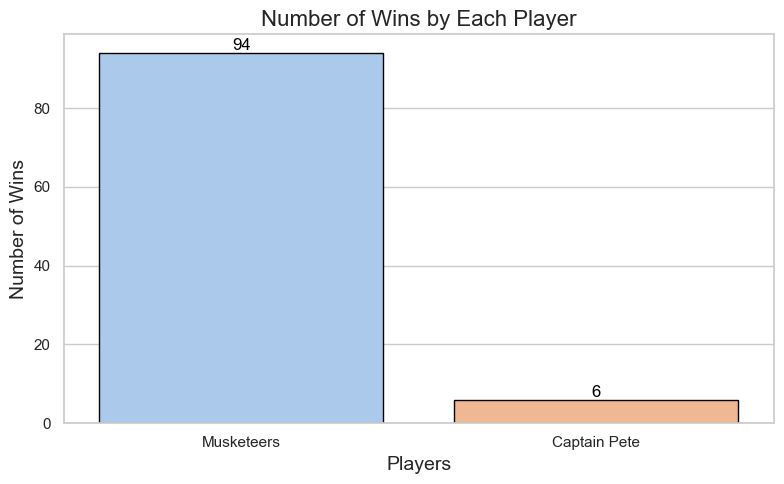

In [5]:
from mini_max_agent import MiniMaxAgent

agent1 = MiniMaxAgent(self_player,
                      max_depth_value, 
                      alignment_weight_value, 
                      trap_weight_value, 
                      moves_weight_value)

agent, pete_men = play_multiple_games(env, agent1, agent2=CaptainPete(2), num_games=num_games_value)
plot_results(agent, pete_men)

ExpectiMax vs Captain Pete

In [ ]:
from expecti_max_agent import ExpectiMaxAgent

agent1 = ExpectiMaxAgent(self_player,
                        max_depth_value, 
                        alignment_weight_value, 
                        trap_weight_value, 
                        moves_weight_value)

agent, pete_men = play_multiple_games(env, agent1, agent2=CaptainPete(2), num_games=num_games_value)
plot_results(agent, pete_men)

In [6]:
import wandb
from three_musketeers_env import ThreeMusketeersEnv
from mini_max_agent import MiniMaxAgent
from expecti_max_agent import ExpectiMaxAgent
from captain_pete import CaptainPete
from play import play_multiple_games, plot_results

def sweep_minimax():
    wandb.init()
    config = wandb.config

    env = ThreeMusketeersEnv(grid_size=5, render_mode='rgb_array')
    self_player = 1

    agent1 = MiniMaxAgent(self_player,
                          config.max_depth, 
                          config.alignment_weight, 
                          config.trap_weight, 
                          config.moves_weight)

    agent_wins, pete_wins = play_multiple_games(env, agent1, agent2=CaptainPete(2), num_games=num_games_value)
    
    win_rate = agent_wins / num_games_value
    wandb.log({"win_rate": win_rate, "agent_wins": agent_wins, "pete_wins": pete_wins})

def sweep_expectimax():
    wandb.init()
    config = wandb.config

    env = ThreeMusketeersEnv(grid_size=5, render_mode='rgb_array')
    self_player = 1

    agent1 = ExpectiMaxAgent(self_player,
                             config.max_depth, 
                             config.alignment_weight, 
                             config.trap_weight, 
                             config.moves_weight)

    agent_wins, pete_wins = play_multiple_games(env, agent1, agent2=CaptainPete(2), num_games=num_games_value)
    
    win_rate = agent_wins / num_games_value 
    wandb.log({"win_rate": win_rate, "agent_wins": agent_wins, "pete_wins": pete_wins})

minimax_sweep_config = {
    'name': 'minimax-sweep',
    'method': 'bayes',
    'metric': {
        'name': 'win_rate',
        'goal': 'maximize'
    },
    'parameters': {
        'max_depth': {
            'distribution': 'int_uniform',
            'min': 2,
            'max': 5
        },
        'alignment_weight': {
            'distribution': 'uniform',
            'min': 5,
            'max': 20
        },
        'trap_weight': {
            'distribution': 'uniform',
            'min': 10,
            'max': 30
        },
        'moves_weight': {
            'distribution': 'uniform',
            'min': 5,
            'max': 15
        }
    }
}

# Sweep configuration for ExpectiMaxAgent
expectimax_sweep_config = {
    'name': 'expectimax-sweep',
    'method': 'bayes',
    'metric': {
        'name': 'win_rate',
        'goal': 'maximize'
    },
    'parameters': {
        'max_depth': {
            'distribution': 'int_uniform',
            'min': 2,
            'max': 5
        },
        'alignment_weight': {
            'distribution': 'uniform',
            'min': 5,
            'max': 20
        },
        'trap_weight': {
            'distribution': 'uniform',
            'min': 10,
            'max': 30
        },
        'moves_weight': {
            'distribution': 'uniform',
            'min': 5,
            'max': 15
        }
    }
}

# Initialize the sweeps
entity = "mateogiraz27-ort"
project = "three-musketeers"
#minimax_sweep_id = wandb.sweep(minimax_sweep_config, entity=entity, project=project)
expectimax_sweep_id = wandb.sweep(expectimax_sweep_config, entity=entity, project=project)


Create sweep with ID: tunqpvvk
Sweep URL: https://wandb.ai/mateogiraz27-ort/three-musketeers/sweeps/tunqpvvk


In [12]:
# Run the minimax sweep
wandb.agent("txk212na", function=sweep_minimax)


wandb: Agent Starting Run: a8a18tft with config:
wandb: 	alignment_weight: 17.2205754471154
wandb: 	max_depth: 3
wandb: 	moves_weight: 6.323688901802033
wandb: 	trap_weight: 24.79078778406748


wandb: 🚀 View run visionary-sweep-2 at: https://wandb.ai/mateogiraz27-ort/three-musketeers/runs/xmiv3fel
wandb: Find logs at: wandb/run-20241214_094214-xmiv3fel/logs


100%|██████████| 100/100 [00:29<00:00,  3.41it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: hqw592jp with config:
wandb: 	alignment_weight: 14.098288099388013
wandb: 	max_depth: 4
wandb: 	moves_weight: 8.184343377472027
wandb: 	trap_weight: 18.62520170122726


100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: pb3gl5fp with config:
wandb: 	alignment_weight: 19.204091676154913
wandb: 	max_depth: 3
wandb: 	moves_weight: 7.348122539873704
wandb: 	trap_weight: 28.55509716125849


100%|██████████| 100/100 [00:29<00:00,  3.38it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: miitepcj with config:
wandb: 	alignment_weight: 8.660113592637694
wandb: 	max_depth: 2
wandb: 	moves_weight: 6.829308352128624
wandb: 	trap_weight: 10.32878065519408


100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: 8snsdxgp with config:
wandb: 	alignment_weight: 7.619868139070423
wandb: 	max_depth: 2
wandb: 	moves_weight: 6.395628220145734
wandb: 	trap_weight: 10.114869918024356


100%|██████████| 100/100 [00:24<00:00,  4.05it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Agent Starting Run: eyf1g3zr with config:
wandb: 	alignment_weight: 8.616528306080355
wandb: 	max_depth: 2
wandb: 	moves_weight: 7.198915983002322
wandb: 	trap_weight: 11.002056025587644


100%|██████████| 100/100 [00:26<00:00,  3.72it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Agent Starting Run: lg6x6qzb with config:
wandb: 	alignment_weight: 6.441647575366055
wandb: 	max_depth: 5
wandb: 	moves_weight: 11.382687913692076
wandb: 	trap_weight: 12.880285601414943


100%|██████████| 100/100 [01:07<00:00,  1.47it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,95
pete_wins,5
win_rate,0.95


wandb: Agent Starting Run: ypi3ecle with config:
wandb: 	alignment_weight: 13.52983801435287
wandb: 	max_depth: 4
wandb: 	moves_weight: 7.018045560518531
wandb: 	trap_weight: 29.282380161900516


100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: 3im9m8j0 with config:
wandb: 	alignment_weight: 9.874484211753996
wandb: 	max_depth: 5
wandb: 	moves_weight: 11.262894586076111
wandb: 	trap_weight: 20.555598897337006


100%|██████████| 100/100 [01:03<00:00,  1.57it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Agent Starting Run: nik6tknb with config:
wandb: 	alignment_weight: 5.925473932932624
wandb: 	max_depth: 5
wandb: 	moves_weight: 12.685384984436116
wandb: 	trap_weight: 11.935579629875065


100%|██████████| 100/100 [01:03<00:00,  1.59it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Agent Starting Run: xc7gu31v with config:
wandb: 	alignment_weight: 8.375786648672936
wandb: 	max_depth: 3
wandb: 	moves_weight: 7.32098351543661
wandb: 	trap_weight: 10.261170341391136


100%|██████████| 100/100 [00:30<00:00,  3.30it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,99
pete_wins,1
win_rate,0.99


wandb: Agent Starting Run: 1x5anuna with config:
wandb: 	alignment_weight: 8.328713747854048
wandb: 	max_depth: 3
wandb: 	moves_weight: 7.672732682616647
wandb: 	trap_weight: 10.351407926318808


100%|██████████| 100/100 [00:28<00:00,  3.45it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4wi0g1uq with config:
wandb: 	alignment_weight: 11.113211646791374
wandb: 	max_depth: 2
wandb: 	moves_weight: 8.147889502468841
wandb: 	trap_weight: 11.119821021042863


100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Agent Starting Run: 42e7n3mi with config:
wandb: 	alignment_weight: 7.753879001926771
wandb: 	max_depth: 3
wandb: 	moves_weight: 10.92911558380263
wandb: 	trap_weight: 25.631363269632683


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,84
pete_wins,16
win_rate,0.84


wandb: Agent Starting Run: kygj9caw with config:
wandb: 	alignment_weight: 7.231247223864964
wandb: 	max_depth: 3
wandb: 	moves_weight: 12.631087516850448
wandb: 	trap_weight: 10.73853928935272


100%|██████████| 100/100 [00:26<00:00,  3.74it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: g7cfsdbg with config:
wandb: 	alignment_weight: 18.8384435023527
wandb: 	max_depth: 3
wandb: 	moves_weight: 7.760931326488309
wandb: 	trap_weight: 27.435938169488963


100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hljxpjxe with config:
wandb: 	alignment_weight: 14.716921207325854
wandb: 	max_depth: 4
wandb: 	moves_weight: 7.4668615959528895
wandb: 	trap_weight: 13.11212081856379


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: lfcrzm0p with config:
wandb: 	alignment_weight: 14.75555912102156
wandb: 	max_depth: 2
wandb: 	moves_weight: 14.427603668801952
wandb: 	trap_weight: 11.82273351243128


100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,58
pete_wins,42
win_rate,0.58


wandb: Agent Starting Run: 42rm7xcq with config:
wandb: 	alignment_weight: 15.71363591821706
wandb: 	max_depth: 5
wandb: 	moves_weight: 7.885375037063625
wandb: 	trap_weight: 29.74533135637512


100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: nozzgdzw with config:
wandb: 	alignment_weight: 10.34352426706394
wandb: 	max_depth: 3
wandb: 	moves_weight: 9.142505116050136
wandb: 	trap_weight: 18.89562899469799


100%|██████████| 100/100 [00:28<00:00,  3.47it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: aduj3q8p with config:
wandb: 	alignment_weight: 9.816267425229846
wandb: 	max_depth: 4
wandb: 	moves_weight: 12.613105337050232
wandb: 	trap_weight: 10.7925240218341


100%|██████████| 100/100 [00:37<00:00,  2.67it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: g2v2dm8k with config:
wandb: 	alignment_weight: 12.41551092472799
wandb: 	max_depth: 2
wandb: 	moves_weight: 9.87975947853838
wandb: 	trap_weight: 17.372478486556243


100%|██████████| 100/100 [00:23<00:00,  4.20it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dp47wdey with config:
wandb: 	alignment_weight: 17.25745411960019
wandb: 	max_depth: 4
wandb: 	moves_weight: 6.444456755398048
wandb: 	trap_weight: 15.731151616199776


100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: mm6vnf4p with config:
wandb: 	alignment_weight: 8.27994432188721
wandb: 	max_depth: 3
wandb: 	moves_weight: 7.3159365540591565
wandb: 	trap_weight: 27.427135266670668


100%|██████████| 100/100 [00:25<00:00,  3.89it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: j2vrxos8 with config:
wandb: 	alignment_weight: 9.160960766864756
wandb: 	max_depth: 2
wandb: 	moves_weight: 5.708887595557761
wandb: 	trap_weight: 20.946768386793764


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: 6nlr1brg with config:
wandb: 	alignment_weight: 15.941511468108606
wandb: 	max_depth: 3
wandb: 	moves_weight: 10.077602566362629
wandb: 	trap_weight: 21.467995282728


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: wwhxnpm4 with config:
wandb: 	alignment_weight: 19.89528404228527
wandb: 	max_depth: 3
wandb: 	moves_weight: 12.717720024157806
wandb: 	trap_weight: 24.58990608254132


100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eyi94wij with config:
wandb: 	alignment_weight: 15.290134178470606
wandb: 	max_depth: 2
wandb: 	moves_weight: 10.989530721290182
wandb: 	trap_weight: 18.9323625012337


100%|██████████| 100/100 [00:26<00:00,  3.72it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: 0nuwbwpd with config:
wandb: 	alignment_weight: 16.81365210013582
wandb: 	max_depth: 2
wandb: 	moves_weight: 8.300630135366434
wandb: 	trap_weight: 10.28616017949594


100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: gkcas63r with config:
wandb: 	alignment_weight: 15.18696429836768
wandb: 	max_depth: 5
wandb: 	moves_weight: 10.289425179852444
wandb: 	trap_weight: 27.242459521002548


100%|██████████| 100/100 [01:14<00:00,  1.33it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: czj9ygpu with config:
wandb: 	alignment_weight: 6.150219411952946
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.40708732876027
wandb: 	trap_weight: 28.029605577391216


100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,77
pete_wins,23
win_rate,0.77


wandb: Agent Starting Run: md0syooo with config:
wandb: 	alignment_weight: 8.511494134937323
wandb: 	max_depth: 5
wandb: 	moves_weight: 9.294173265513988
wandb: 	trap_weight: 16.010398252383343


100%|██████████| 100/100 [01:02<00:00,  1.60it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: iajdtjhm with config:
wandb: 	alignment_weight: 17.78101334207957
wandb: 	max_depth: 4
wandb: 	moves_weight: 8.421549958784455
wandb: 	trap_weight: 22.396698450502804


100%|██████████| 100/100 [00:39<00:00,  2.56it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: an7z6llg with config:
wandb: 	alignment_weight: 16.219510071854444
wandb: 	max_depth: 2
wandb: 	moves_weight: 10.838426142462634
wandb: 	trap_weight: 29.986509578223316


100%|██████████| 100/100 [00:24<00:00,  4.13it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: jdqbpwe4 with config:
wandb: 	alignment_weight: 15.10877060983295
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.780583183343056
wandb: 	trap_weight: 24.534135961821903


100%|██████████| 100/100 [00:38<00:00,  2.58it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,84
pete_wins,16
win_rate,0.84


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aftdcfpj with config:
wandb: 	alignment_weight: 5.712271449586014
wandb: 	max_depth: 2
wandb: 	moves_weight: 13.321416062825696
wandb: 	trap_weight: 24.637745354328946


100%|██████████| 100/100 [00:17<00:00,  5.70it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,64
pete_wins,36
win_rate,0.64


wandb: Agent Starting Run: 7c59a3p8 with config:
wandb: 	alignment_weight: 12.172418519850275
wandb: 	max_depth: 5
wandb: 	moves_weight: 7.266914118725259
wandb: 	trap_weight: 23.479502457010145


100%|██████████| 100/100 [01:04<00:00,  1.54it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,96
pete_wins,4
win_rate,0.96


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gmmxefrj with config:
wandb: 	alignment_weight: 6.7334882871606005
wandb: 	max_depth: 5
wandb: 	moves_weight: 9.793872895670484
wandb: 	trap_weight: 28.043422252251464


100%|██████████| 100/100 [01:06<00:00,  1.49it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Agent Starting Run: o1r62xv5 with config:
wandb: 	alignment_weight: 14.306933829709578
wandb: 	max_depth: 2
wandb: 	moves_weight: 13.122624705960153
wandb: 	trap_weight: 28.427181096008887


100%|██████████| 100/100 [00:16<00:00,  5.90it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,76
pete_wins,24
win_rate,0.76


wandb: Agent Starting Run: mkr76woo with config:
wandb: 	alignment_weight: 18.71126734049056
wandb: 	max_depth: 4
wandb: 	moves_weight: 10.48211815159485
wandb: 	trap_weight: 25.851392361110463


100%|██████████| 100/100 [00:43<00:00,  2.29it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0am2jdaq with config:
wandb: 	alignment_weight: 17.101661955970613
wandb: 	max_depth: 2
wandb: 	moves_weight: 5.4310010765092045
wandb: 	trap_weight: 17.52472310466323


100%|██████████| 100/100 [00:24<00:00,  4.04it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Agent Starting Run: fwzcf5py with config:
wandb: 	alignment_weight: 18.399966312903196
wandb: 	max_depth: 3
wandb: 	moves_weight: 13.640339642639695
wandb: 	trap_weight: 11.413271512429322


100%|██████████| 100/100 [00:27<00:00,  3.60it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: 8p9jevf5 with config:
wandb: 	alignment_weight: 11.40525473445132
wandb: 	max_depth: 5
wandb: 	moves_weight: 14.77972371449103
wandb: 	trap_weight: 11.27497053714511


100%|██████████| 100/100 [01:09<00:00,  1.44it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: 0sclirtq with config:
wandb: 	alignment_weight: 13.85423871287825
wandb: 	max_depth: 3
wandb: 	moves_weight: 13.729457170507116
wandb: 	trap_weight: 19.339981693620775


100%|██████████| 100/100 [00:32<00:00,  3.09it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,86
pete_wins,14
win_rate,0.86


wandb: Agent Starting Run: 6xckr1hb with config:
wandb: 	alignment_weight: 8.636855036866129
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.956795983234771
wandb: 	trap_weight: 25.42481247996054


100%|██████████| 100/100 [00:35<00:00,  2.84it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,75
pete_wins,25
win_rate,0.75


wandb: Agent Starting Run: 4m7xudx7 with config:
wandb: 	alignment_weight: 10.122152602110242
wandb: 	max_depth: 4
wandb: 	moves_weight: 6.344858263950793
wandb: 	trap_weight: 10.440765524132228


100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: yoww4nfe with config:
wandb: 	alignment_weight: 8.995268857857068
wandb: 	max_depth: 3
wandb: 	moves_weight: 5.687956320755994
wandb: 	trap_weight: 10.759820739352984


100%|██████████| 100/100 [00:29<00:00,  3.39it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: y96ri47c with config:
wandb: 	alignment_weight: 6.343561430253643
wandb: 	max_depth: 5
wandb: 	moves_weight: 12.891331714450622
wandb: 	trap_weight: 20.547737228691247


100%|██████████| 100/100 [01:04<00:00,  1.54it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gqwuz8w6 with config:
wandb: 	alignment_weight: 5.213084302861303
wandb: 	max_depth: 4
wandb: 	moves_weight: 9.88116575747655
wandb: 	trap_weight: 11.713358184740732


100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: 42luean2 with config:
wandb: 	alignment_weight: 15.651135529142609
wandb: 	max_depth: 5
wandb: 	moves_weight: 12.074958452944273
wandb: 	trap_weight: 29.88093614475666


100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: 3ln3ic7s with config:
wandb: 	alignment_weight: 12.165368554625513
wandb: 	max_depth: 4
wandb: 	moves_weight: 10.791095274499368
wandb: 	trap_weight: 15.62744253893296


100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: ty95vc65 with config:
wandb: 	alignment_weight: 17.12353222484356
wandb: 	max_depth: 3
wandb: 	moves_weight: 14.040078101655444
wandb: 	trap_weight: 19.760874030336527


100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: iitxws78 with config:
wandb: 	alignment_weight: 16.78431962000012
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.00107626479393
wandb: 	trap_weight: 25.01156890624899


100%|██████████| 100/100 [00:38<00:00,  2.58it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1xpzmp5j with config:
wandb: 	alignment_weight: 17.58056046076043
wandb: 	max_depth: 4
wandb: 	moves_weight: 11.035209276988432
wandb: 	trap_weight: 14.06539784649533


100%|██████████| 100/100 [00:40<00:00,  2.45it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Agent Starting Run: vwn2rf9i with config:
wandb: 	alignment_weight: 10.904254387193422
wandb: 	max_depth: 3
wandb: 	moves_weight: 13.274513159168452
wandb: 	trap_weight: 28.894425887601344


100%|██████████| 100/100 [00:28<00:00,  3.47it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: wdhyhkoc with config:
wandb: 	alignment_weight: 5.653314399869627
wandb: 	max_depth: 4
wandb: 	moves_weight: 7.391208445820836
wandb: 	trap_weight: 22.356752210500694


100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lzjqla0s with config:
wandb: 	alignment_weight: 18.129366714967837
wandb: 	max_depth: 5
wandb: 	moves_weight: 6.684846508848029
wandb: 	trap_weight: 16.994356537457346


100%|██████████| 100/100 [01:04<00:00,  1.55it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dqv4ka56 with config:
wandb: 	alignment_weight: 8.31674624816149
wandb: 	max_depth: 2
wandb: 	moves_weight: 6.92143521024307
wandb: 	trap_weight: 16.27915184878909


100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: x8bl7stu with config:
wandb: 	alignment_weight: 8.561614984403043
wandb: 	max_depth: 5
wandb: 	moves_weight: 7.059072755010215
wandb: 	trap_weight: 21.862045976730876


100%|██████████| 100/100 [01:04<00:00,  1.56it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l1sph6xw with config:
wandb: 	alignment_weight: 5.809712187873533
wandb: 	max_depth: 3
wandb: 	moves_weight: 9.780746864506796
wandb: 	trap_weight: 13.575477362157985


100%|██████████| 100/100 [00:24<00:00,  4.07it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: slw2pidk with config:
wandb: 	alignment_weight: 16.96669114842535
wandb: 	max_depth: 3
wandb: 	moves_weight: 13.570864010954509
wandb: 	trap_weight: 18.01466618018848


100%|██████████| 100/100 [00:28<00:00,  3.57it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: zowpi9sg with config:
wandb: 	alignment_weight: 15.262248031383535
wandb: 	max_depth: 4
wandb: 	moves_weight: 11.234041451947796
wandb: 	trap_weight: 28.24084338832269


100%|██████████| 100/100 [00:38<00:00,  2.59it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: iv6iz7p2 with config:
wandb: 	alignment_weight: 10.772162623303847
wandb: 	max_depth: 3
wandb: 	moves_weight: 11.268480938845324
wandb: 	trap_weight: 17.9209459483345


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: exyv24me with config:
wandb: 	alignment_weight: 17.37596674624811
wandb: 	max_depth: 5
wandb: 	moves_weight: 13.387287287483444
wandb: 	trap_weight: 29.428972445215734


100%|██████████| 100/100 [01:06<00:00,  1.50it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,85
pete_wins,15
win_rate,0.85


wandb: Agent Starting Run: yz5jaxqm with config:
wandb: 	alignment_weight: 14.519230996821076
wandb: 	max_depth: 3
wandb: 	moves_weight: 8.165920570699143
wandb: 	trap_weight: 19.586668411565427


100%|██████████| 100/100 [00:26<00:00,  3.74it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: x0oosoih with config:
wandb: 	alignment_weight: 6.3386407974867875
wandb: 	max_depth: 3
wandb: 	moves_weight: 9.8608160393761
wandb: 	trap_weight: 18.74920140701345


100%|██████████| 100/100 [00:32<00:00,  3.09it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: jlbxtl4b with config:
wandb: 	alignment_weight: 17.430786364036244
wandb: 	max_depth: 4
wandb: 	moves_weight: 12.400787156532171
wandb: 	trap_weight: 28.556885584814975


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,86
pete_wins,14
win_rate,0.86


wandb: Agent Starting Run: 2l7168y5 with config:
wandb: 	alignment_weight: 6.845622279504129
wandb: 	max_depth: 2
wandb: 	moves_weight: 10.053027322595446
wandb: 	trap_weight: 12.789311675150834


100%|██████████| 100/100 [00:24<00:00,  4.13it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zsyrwbtp with config:
wandb: 	alignment_weight: 6.001239522351817
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.355020992727782
wandb: 	trap_weight: 11.782789606458127


100%|██████████| 100/100 [00:36<00:00,  2.74it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,82
pete_wins,18
win_rate,0.82


wandb: Agent Starting Run: bg3ik525 with config:
wandb: 	alignment_weight: 16.27001805351209
wandb: 	max_depth: 4
wandb: 	moves_weight: 7.745489941278664
wandb: 	trap_weight: 19.951337401967


100%|██████████| 100/100 [00:38<00:00,  2.63it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: crcwm9wi with config:
wandb: 	alignment_weight: 18.11831001144173
wandb: 	max_depth: 5
wandb: 	moves_weight: 11.647211887257605
wandb: 	trap_weight: 15.35528793371448


100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: 6qcbn6zt with config:
wandb: 	alignment_weight: 18.94236072042515
wandb: 	max_depth: 3
wandb: 	moves_weight: 13.65529214658972
wandb: 	trap_weight: 11.307522935527352


100%|██████████| 100/100 [00:28<00:00,  3.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nji53rzw with config:
wandb: 	alignment_weight: 10.105332221678813
wandb: 	max_depth: 5
wandb: 	moves_weight: 7.459178548945539
wandb: 	trap_weight: 26.08528913470838


100%|██████████| 100/100 [01:04<00:00,  1.55it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: nkyret36 with config:
wandb: 	alignment_weight: 6.445482482204185
wandb: 	max_depth: 3
wandb: 	moves_weight: 5.632038256650751
wandb: 	trap_weight: 24.105299006071235


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,86
pete_wins,14
win_rate,0.86


wandb: Agent Starting Run: ioytjt6m with config:
wandb: 	alignment_weight: 14.049879075373928
wandb: 	max_depth: 4
wandb: 	moves_weight: 7.148260245964454
wandb: 	trap_weight: 10.861007784938131


100%|██████████| 100/100 [00:42<00:00,  2.38it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: nqlyuy7r with config:
wandb: 	alignment_weight: 15.82835651569426
wandb: 	max_depth: 3
wandb: 	moves_weight: 11.7079960838402
wandb: 	trap_weight: 26.78779826759161


100%|██████████| 100/100 [00:34<00:00,  2.87it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: p5jetowv with config:
wandb: 	alignment_weight: 15.426692499522076
wandb: 	max_depth: 2
wandb: 	moves_weight: 13.176644219673662
wandb: 	trap_weight: 20.12296380927272


100%|██████████| 100/100 [00:17<00:00,  5.75it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,70
pete_wins,30
win_rate,0.7


wandb: Agent Starting Run: bu2snuy9 with config:
wandb: 	alignment_weight: 15.306462733172111
wandb: 	max_depth: 4
wandb: 	moves_weight: 12.548483778027611
wandb: 	trap_weight: 27.71392277476859


100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: hhkjwh9v with config:
wandb: 	alignment_weight: 13.752986774798234
wandb: 	max_depth: 5
wandb: 	moves_weight: 13.276825728846614
wandb: 	trap_weight: 14.538203745179848


100%|██████████| 100/100 [01:05<00:00,  1.53it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r9xiz07y with config:
wandb: 	alignment_weight: 7.0095903153529235
wandb: 	max_depth: 5
wandb: 	moves_weight: 13.965317804424416
wandb: 	trap_weight: 20.50913073739882


100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: y69y5chr with config:
wandb: 	alignment_weight: 18.94985405925575
wandb: 	max_depth: 4
wandb: 	moves_weight: 11.56643618299707
wandb: 	trap_weight: 18.545072703898747


100%|██████████| 100/100 [00:41<00:00,  2.38it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,96
pete_wins,4
win_rate,0.96


wandb: Agent Starting Run: od9xh7ft with config:
wandb: 	alignment_weight: 15.608849264940224
wandb: 	max_depth: 2
wandb: 	moves_weight: 10.017924300958809
wandb: 	trap_weight: 13.122945053137228


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,84
pete_wins,16
win_rate,0.84


wandb: Agent Starting Run: kx0cevt9 with config:
wandb: 	alignment_weight: 7.705631778869043
wandb: 	max_depth: 3
wandb: 	moves_weight: 6.679420860306063
wandb: 	trap_weight: 26.403599425355488


100%|██████████| 100/100 [00:31<00:00,  3.17it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: gpizyjj3 with config:
wandb: 	alignment_weight: 7.875251361799389
wandb: 	max_depth: 3
wandb: 	moves_weight: 10.16322563041096
wandb: 	trap_weight: 16.56520773515877


100%|██████████| 100/100 [00:33<00:00,  2.97it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cofue67g with config:
wandb: 	alignment_weight: 12.557323609440132
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.651790673911048
wandb: 	trap_weight: 16.864394342116952


100%|██████████| 100/100 [00:36<00:00,  2.70it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,81
pete_wins,19
win_rate,0.81


wandb: Agent Starting Run: 87m9a6gs with config:
wandb: 	alignment_weight: 19.094753079677545
wandb: 	max_depth: 2
wandb: 	moves_weight: 9.434503588108257
wandb: 	trap_weight: 21.784496175908895


100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: scul48ly with config:
wandb: 	alignment_weight: 13.805772328998072
wandb: 	max_depth: 5
wandb: 	moves_weight: 5.058480543196505
wandb: 	trap_weight: 28.46461744460448


100%|██████████| 100/100 [01:20<00:00,  1.24it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nqafznb2 with config:
wandb: 	alignment_weight: 8.032517377245899
wandb: 	max_depth: 3
wandb: 	moves_weight: 11.301229285926976
wandb: 	trap_weight: 16.638782730252586


100%|██████████| 100/100 [00:29<00:00,  3.39it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,85
pete_wins,15
win_rate,0.85


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8mrazka1 with config:
wandb: 	alignment_weight: 12.066250852751685
wandb: 	max_depth: 4
wandb: 	moves_weight: 13.91982825511226
wandb: 	trap_weight: 24.401844582324784


100%|██████████| 100/100 [00:38<00:00,  2.59it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,83
pete_wins,17
win_rate,0.83


wandb: Agent Starting Run: wwjz8l2j with config:
wandb: 	alignment_weight: 7.861290196395555
wandb: 	max_depth: 5
wandb: 	moves_weight: 11.405411746741384
wandb: 	trap_weight: 15.964763195914756


100%|██████████| 100/100 [01:03<00:00,  1.57it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: tli2sqs8 with config:
wandb: 	alignment_weight: 18.83074467729869
wandb: 	max_depth: 3
wandb: 	moves_weight: 12.541263087646293
wandb: 	trap_weight: 10.86329690664326


100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,93
pete_wins,7
win_rate,0.93


wandb: Agent Starting Run: aa9h9juv with config:
wandb: 	alignment_weight: 6.6201196871658485
wandb: 	max_depth: 4
wandb: 	moves_weight: 7.708883938925744
wandb: 	trap_weight: 29.600738330088625


100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: 8l4g4bvr with config:
wandb: 	alignment_weight: 19.968817321395427
wandb: 	max_depth: 2
wandb: 	moves_weight: 14.609380751967947
wandb: 	trap_weight: 21.74043815212633


100%|██████████| 100/100 [00:13<00:00,  7.45it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,52
pete_wins,48
win_rate,0.52


wandb: Agent Starting Run: epcetjdt with config:
wandb: 	alignment_weight: 18.190533129347585
wandb: 	max_depth: 5
wandb: 	moves_weight: 12.72354467364822
wandb: 	trap_weight: 19.99358873979033


100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Agent Starting Run: 33y8a0en with config:
wandb: 	alignment_weight: 8.781944596101452
wandb: 	max_depth: 4
wandb: 	moves_weight: 6.90120616938624
wandb: 	trap_weight: 10.633501046477516


100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: w9oz9sag with config:
wandb: 	alignment_weight: 17.778320532083207
wandb: 	max_depth: 4
wandb: 	moves_weight: 13.083618740328497
wandb: 	trap_weight: 19.634009698128533


100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: 4p8p1hks with config:
wandb: 	alignment_weight: 8.279184389191116
wandb: 	max_depth: 3
wandb: 	moves_weight: 6.718736729103006
wandb: 	trap_weight: 11.00535042315056


100%|██████████| 100/100 [00:29<00:00,  3.43it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: i8s0na1r with config:
wandb: 	alignment_weight: 10.81976866339705
wandb: 	max_depth: 4
wandb: 	moves_weight: 5.093982166153815
wandb: 	trap_weight: 23.978183253433063


100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,91
pete_wins,9
win_rate,0.91


wandb: Agent Starting Run: f9yfe6tz with config:
wandb: 	alignment_weight: 9.952301112836846
wandb: 	max_depth: 2
wandb: 	moves_weight: 5.822676759226839
wandb: 	trap_weight: 20.21294391166035


100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,97
pete_wins,3
win_rate,0.97


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: h2z1ldly with config:
wandb: 	alignment_weight: 9.20646914753494
wandb: 	max_depth: 2
wandb: 	moves_weight: 11.347558393685947
wandb: 	trap_weight: 21.35080208429128


100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,80
pete_wins,20
win_rate,0.8


wandb: Agent Starting Run: depw8m6p with config:
wandb: 	alignment_weight: 17.899229512601487
wandb: 	max_depth: 3
wandb: 	moves_weight: 14.191304949197075
wandb: 	trap_weight: 21.50467955117626


100%|██████████| 100/100 [00:29<00:00,  3.34it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,92
pete_wins,8
win_rate,0.92


wandb: Agent Starting Run: nrljx2w2 with config:
wandb: 	alignment_weight: 12.304238994844404
wandb: 	max_depth: 2
wandb: 	moves_weight: 8.890165152238769
wandb: 	trap_weight: 25.588925143057352


100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: 39wdli5v with config:
wandb: 	alignment_weight: 6.162190220278825
wandb: 	max_depth: 5
wandb: 	moves_weight: 12.344730334116388
wandb: 	trap_weight: 11.034837781446283


100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,86
pete_wins,14
win_rate,0.86


wandb: Agent Starting Run: 0zsq4lfe with config:
wandb: 	alignment_weight: 17.852219816188857
wandb: 	max_depth: 3
wandb: 	moves_weight: 9.245758214179816
wandb: 	trap_weight: 13.422452885909824


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,96
pete_wins,4
win_rate,0.96


wandb: Agent Starting Run: r81zntu6 with config:
wandb: 	alignment_weight: 9.244695584417196
wandb: 	max_depth: 5
wandb: 	moves_weight: 7.996419533590534
wandb: 	trap_weight: 10.393244347012695


100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,97
pete_wins,3
win_rate,0.97


wandb: Agent Starting Run: njt051dz with config:
wandb: 	alignment_weight: 18.788499875395065
wandb: 	max_depth: 4
wandb: 	moves_weight: 14.442121301524809
wandb: 	trap_weight: 12.298379282787804


100%|██████████| 100/100 [00:34<00:00,  2.90it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,77
pete_wins,23
win_rate,0.77


wandb: Agent Starting Run: hg4ldu85 with config:
wandb: 	alignment_weight: 7.398708754578438
wandb: 	max_depth: 3
wandb: 	moves_weight: 6.277865148382302
wandb: 	trap_weight: 27.969913351257752


100%|██████████| 100/100 [00:31<00:00,  3.21it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,94
pete_wins,6
win_rate,0.94


wandb: Agent Starting Run: nhknbxz2 with config:
wandb: 	alignment_weight: 12.299900696669534
wandb: 	max_depth: 5
wandb: 	moves_weight: 11.544069792408807
wandb: 	trap_weight: 24.288774504629593


100%|██████████| 100/100 [01:17<00:00,  1.28it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: rt5ggr5s with config:
wandb: 	alignment_weight: 13.072514507169824
wandb: 	max_depth: 3
wandb: 	moves_weight: 5.390905366620633
wandb: 	trap_weight: 29.16651906753472


100%|██████████| 100/100 [00:28<00:00,  3.52it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,86
pete_wins,14
win_rate,0.86


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: g50qz5b7 with config:
wandb: 	alignment_weight: 11.58763168641782
wandb: 	max_depth: 4
wandb: 	moves_weight: 5.668007902899342
wandb: 	trap_weight: 12.92740544319134


100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: l1rafdd1 with config:
wandb: 	alignment_weight: 18.445252631965992
wandb: 	max_depth: 4
wandb: 	moves_weight: 10.272084621931354
wandb: 	trap_weight: 29.74362842890063


100%|██████████| 100/100 [00:44<00:00,  2.27it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,89
pete_wins,11
win_rate,0.89


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gkigsjya with config:
wandb: 	alignment_weight: 19.079262354112945
wandb: 	max_depth: 4
wandb: 	moves_weight: 13.379266722851662
wandb: 	trap_weight: 12.8309511119535


100%|██████████| 100/100 [00:42<00:00,  2.36it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,87
pete_wins,13
win_rate,0.87


wandb: Agent Starting Run: p9ljyf1q with config:
wandb: 	alignment_weight: 16.687820513176113
wandb: 	max_depth: 3
wandb: 	moves_weight: 6.431603991713223
wandb: 	trap_weight: 28.318974533226076


100%|██████████| 100/100 [00:31<00:00,  3.15it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,95
pete_wins,5
win_rate,0.95


wandb: Agent Starting Run: fe4ba0tu with config:
wandb: 	alignment_weight: 18.438663674279507
wandb: 	max_depth: 4
wandb: 	moves_weight: 9.063741171448353
wandb: 	trap_weight: 24.52270122482403


100%|██████████| 100/100 [00:45<00:00,  2.18it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,90
pete_wins,10
win_rate,0.9


wandb: Agent Starting Run: aqwt9vna with config:
wandb: 	alignment_weight: 12.639567899805442
wandb: 	max_depth: 3
wandb: 	moves_weight: 5.499881871000963
wandb: 	trap_weight: 18.65887698999543


100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


agent_wins,▁
pete_wins,▁
win_rate,▁
agent_wins,88
pete_wins,12
win_rate,0.88


wandb: Agent Starting Run: ioxq957w with config:
wandb: 	alignment_weight: 9.553178173612864
wandb: 	max_depth: 3
wandb: 	moves_weight: 8.461041415489039
wandb: 	trap_weight: 10.545498362788148


wandb: Ctrl + C detected. Stopping sweep.


In [7]:
# Run the expectimax sweep
wandb.agent("btf8pcci", function=sweep_expectimax)

wandb: Agent Starting Run: zw94tkn1 with config:
wandb: 	alignment_weight: 15.321723244751654
wandb: 	max_depth: 3
wandb: 	moves_weight: 8.159652618968376
wandb: 	trap_weight: 21.052735186081755


 23%|██▎       | 23/100 [00:07<00:25,  3.03it/s]